## Preparation

In [1]:
from os import listdir
from os.path import isfile, join
import os
import os
os.chdir("/home/seleythen/Pobrane")
import re
import pandas
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [2]:
def reader_fos(fileName):
    df = pandas.read_json(fileName, lines=True)
    fos_authors_and_year = df[["id", "year", "authors", "fos", "references"]]
    filtered_years = fos_authors_and_year.loc[fos_authors_and_year["year"] > 2010]
    filtered_years = filtered_years.loc[filtered_years["year"] < 2018]
    return filtered_years

In [3]:
dblp_part_regex = re.compile("author_indexed_fos*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)
part_files = list(part_files_filter_obj)

In [4]:
list_of_dataframes = list(map(reader_fos, part_files))
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [5]:
filtered_years = df
len(filtered_years)

1777240

In [6]:
def get_authors_ids(references_list):
    authors = []
    if not isinstance(references_list, list) and pandas.isna(references_list):
        return []
    for reference_id in references_list:
        reference_authors = list(df.loc[df["id"] == int(reference_id)]["authors"])
        if len(reference_authors):
            authors.extend(list(map(lambda x: x["index"], reference_authors[0])))
    return list(set(authors))

In [9]:
classes = pandas.read_csv("classes_fos.csv", index_col=0)
agent_systems_class = classes.loc[classes["modularity_class"] == 8]

In [10]:
agent_systems_class["Id"].values

array([2639, 1368,  193,  689,  191,  199,  196,  198, 3850])

In [11]:
def common_member(list_a, list_b):
    a_set = set(list_a)
    b_set = set(list_b)
    return len(a_set & b_set) > 0

In [12]:
filtered_with_wages = filtered_years.loc[filtered_years["fos"].apply(lambda x: type(x) is not float)]
filtered_with_wages

,id,year,authors,fos,references
0,1996175362,2012.0,"[{'index': 193842}, {'index': 193843}, {'index...","[{'name': '96', 'w': 0.45922613100000004}, {'n...",[1965408437]
1,1996175365,2014.0,"[{'index': 367061}, {'index': 209885}, {'index...","[{'name': '524', 'w': 0.45862042900000005}, {'...","[1511827303, 1541708852, 1585487023, 179158766..."
2,1996175602,2015.0,"[{'index': 276446}, {'index': 196814}, {'index...","[{'name': '17372', 'w': 0.44420751900000005}, ...","[306660194, 1782903374, 1882088395, 1989274697..."
3,1996175642,2011.0,"[{'index': 758}, {'index': 43243}, {'index': 5...","[{'name': '7222', 'w': 0.4367316}, {'name': '1...","[2026759935, 2162908184]"
4,1996176291,2013.0,"[{'index': 516371}, {'index': 516372}, {'index...","[{'name': '419', 'w': 0.45580807300000004}, {'...","[1978033128, 2087034597, 2116101591, 214785302..."
...,...,...,...,...,...
1777235,96295004,2013.0,"[{'index': 250615}, {'index': 369275}, {'index...","[{'name': '443', 'w': 0.5813411470000001}, {'n...",[35111916]
1777236,962972029,2015.0,"[{'index': 278830}, {'index': 369278}]","[{'name': '524', 'w': 0.44933956900000005}, {'...","[2028419480, 2069541868, 2086673082, 209617849..."
1777237,963004418,2015.0,"[{'index': 350317}, {'index': 350318}, {'index...","[{'name': '485', 'w': 0.40057099999999995}, {'...","[8830101, 2182919690]"
1777238,96301023,2014.0,"[{'index': 212342}, {'index': 2323}, {'index':...","[{'name': '1214', 'w': 0.48527339999999997}, {...","[1525018799, 1779843715, 1803485664, 196839275..."


In [13]:
filtered_slice = filtered_years

In [14]:
filtered_slice["fos"] = filtered_with_wages["fos"].apply(lambda row: [int(field["name"]) for field in row])

In [15]:
filtered_slice = filtered_slice.loc[filtered_slice["fos"].apply(lambda foses: common_member(foses, agent_systems_class["Id"].values))]

In [16]:
len(filtered_slice)

9422

In [17]:
filtered_slice["author_references"] = filtered_slice["references"].apply(get_authors_ids)

/home/seleythen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
filtered_slice

,id,year,authors,fos,references,author_references
301,1996246189,2013.0,"[{'index': 517355}, {'index': 37954}]","[1459, 1109, 17, 3, 1148, 208, 3692, 2896, 939...","[1974229901, 1983602561, 2050890381, 208732425...","[568107, 448130, 1517315, 424055]"
304,1996247368,2012.0,"[{'index': 517365}, {'index': 517366}]","[193, 689, 191, 192, 17, 690, 194, 982, 195, 1...","[2132589884, 2158323258, 2163450360, 217133033...",[]
503,1996289414,2015.0,"[{'index': 518019}, {'index': 35835}, {'index'...","[97, 324, 96, 443, 195, 17, 14254, 328, 436, 1...","[2017282549, 2029080716, 2039688938, 205614663...","[518019, 509956, 518020, 2425851, 31509, 17569..."
526,1996295989,2014.0,"[{'index': 518099}, {'index': 518100}]","[689, 690, 191, 193, 982, 102, 195, 198, 199, ...",NaN,[]
834,1996372270,2014.0,"[{'index': 519021}, {'index': 519022}, {'index...","[193, 192, 195, 191, 194, 344, 198, 197, 122, ...","[1602835594, 1972868674, 1988249672, 199165907...","[146436, 907796, 27288, 1071641, 115867, 90882..."
...,...,...,...,...,...,...
1775683,94635768,2011.0,"[{'index': 26213}, {'index': 364797}, {'index'...","[193, 195, 46, 109, 690, 122, 266, 198, 1191, ...","[1487076132, 1493893823, 1861377444, 198958291...","[282349, 282348, 26213, 364798]"
1775784,947405740,2015.0,"[{'index': 365116}, {'index': 252447}, {'index...","[20204, 6326, 690, 2639, 5364, 2373, 4466, 80]","[1869932846, 1973381185, 1987959245, 204667804...","[780611, 167097, 228297, 228298, 268334, 16833..."
1776019,94966275,2012.0,"[{'index': 238274}, {'index': 128167}, {'index...","[18867, 30660, 5571, 17, 2639, 10, 31, 1]","[192227941, 1519028140, 1534477342, 1595709980...",[]
1776304,952675748,2013.0,[{'index': 366577}],"[6140, 2270, 3, 193, 1367, 2251, 4750, 3371, 1...",NaN,[]


In [19]:
from networkx.algorithms.community.kclique import k_clique_communities

In [20]:
citation_dict = {}
def fill_graph(row, graph):
    authors = list(row["authors"])
    references_authors = list(row["author_references"])
    for author in list(authors):
        for reference_author in references_authors:
            edge_name = str(author["index"]) + "_" + str(reference_author)
            weight = graph.get(edge_name, 0)
            graph[edge_name] = weight + 1
            
filtered_slice.apply(lambda row: fill_graph(row, citation_dict), axis=1)

301        None
304        None
503        None
526        None
834        None
           ... 
1775683    None
1775784    None
1776019    None
1776304    None
1776317    None
Length: 9422, dtype: object

In [21]:
import networkx
citation_graph = networkx.DiGraph()
for edge in citation_dict.keys():
    nodes = edge.split("_")
    node_x = int(nodes[0])
    node_y = int(nodes[1])
    weight = int(citation_dict[edge])
    citation_graph.add_edge(node_x, node_y, weight = weight)
citation_graph

In [22]:
citation_graph.number_of_edges()

413141

In [44]:
networkx.write_gexf(citation_graph,"citation_graph_for_agent_systems.gexf")

In [23]:
def are_bidirectional_neighbors(a, b, g):
    return a in g.neighbors(b)

In [24]:
def get_bidirectional_nodes(graph):
    bidirectional_nodes = {}
    for element, adjacency in graph.adjacency():
        b_neighbors = list(adjacency.keys())
        for neighbor in b_neighbors:
            if element != neighbor and are_bidirectional_neighbors(element, neighbor, graph):
                element_bidirectional_neighbours = bidirectional_nodes.get(element, [])
                element_bidirectional_neighbours.append(neighbor)
                bidirectional_nodes[element] = element_bidirectional_neighbours
    return bidirectional_nodes
bidirectional_nodes = get_bidirectional_nodes(citation_graph)

Creating graph for k-clique algorithm. Two nodes are connected, if in graph exist edges A->B->A

In [26]:
cocitation_graph = networkx.Graph()
for node, neighbours in bidirectional_nodes.items():
    for neighbour in neighbours:
        cocitation_graph.add_edge(node, neighbour)

In [27]:
len(cocitation_graph.nodes)

5981

In [28]:
len(cocitation_graph.edges)

11100

## Clustering in co-citation graph and groups

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Clustering coefficient')

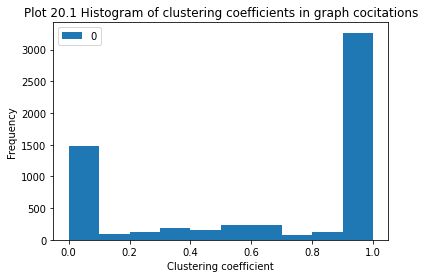

In [85]:
ax = pandas.DataFrame(data=networkx.clustering(cocitation_graph).values()).plot.hist()
ax.set_title("Plot 20.1 Histogram of clustering coefficients in graph cocitations")
ax.set_xlabel("Clustering coefficient")

Calculate k-cliques. K = 3

In [86]:
from networkx.algorithms.community.kclique import k_clique_communities

In [87]:
communities_in_cocitation_gen = k_clique_communities(cocitation_graph, 3)

In [88]:
communities_in_cocitation = []
for community in communities_in_cocitation_gen:
    communities_in_cocitation.append(community)

In [89]:
len(communities_in_cocitation)

943

Text(0.5, 0, 'Group size')

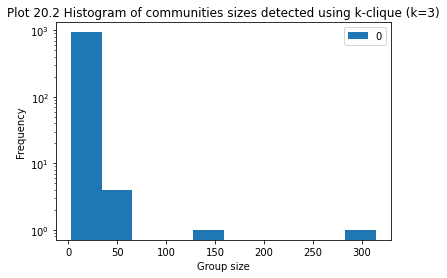

In [90]:
sizes_of_communites = [len(community) for community in communities_in_cocitation]
ax = pandas.DataFrame(sizes_of_communites).plot.hist()
plt.yscale('log')
ax.set_title("Plot 20.2 Histogram of communities sizes detected using k-clique (k=3)")
ax.set_xlabel("Group size")

In [91]:
communities_graph = networkx.Graph()
for index, community in enumerate(communities_in_cocitation):
    for other_index, other_community in enumerate(communities_in_cocitation[(index + 1):]):
        if community.intersection(other_community):
            label = str(index) + "_" + str(other_index)
            communities_graph.add_edge(index, other_index + index)

Text(0.5, 1.0, 'Plot 20.3 Co-citation communities (k-clique, k = 3) graph \n Edge is present if two communities has common member')

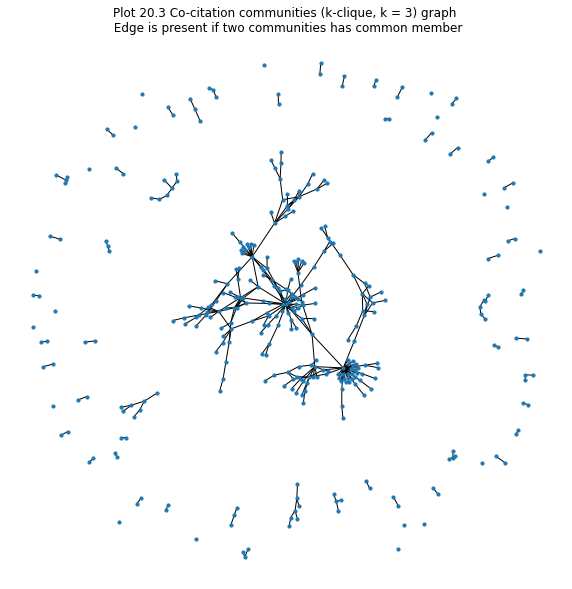

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
networkx.draw(communities_graph, node_size=10)
ax.set_title("Plot 20.3 Co-citation communities (k-clique, k = 3) graph \n Edge is present if two communities has common member")

Above graph can be interpreted as follows:
 - separate groups- groups not interacted recetly with others
 - nodes with high degree- interdisciplinary groups or groups which intensively synthesis others papers 

In [93]:
community_components_gen = networkx.connected_components(communities_graph)

In [94]:
community_components = [community_component for community_component in community_components_gen]

In [95]:
largest_cc = max(community_components, key=len)

Text(0.5, 1.0, 'Plot 20.4 Largest connected component in communities graph')

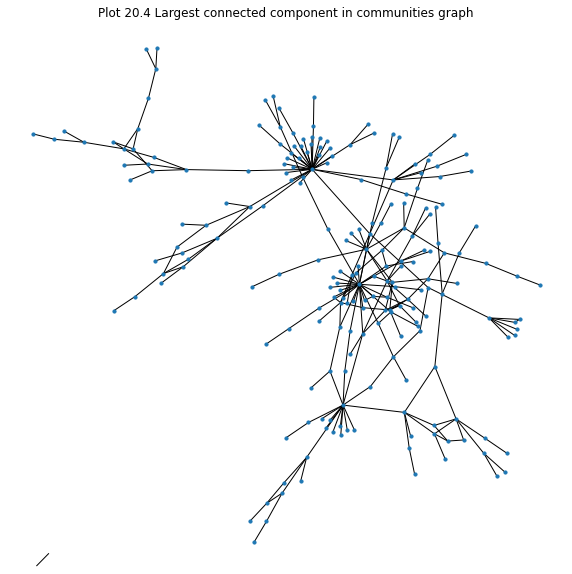

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
networkx.draw(communities_graph, nodelist=list(largest_cc), node_size=10)
ax.set_title("Plot 20.4 Largest connected component in communities graph")

In [97]:
sorted_list = list(networkx.degree(communities_graph))
sorted_list.sort(key=lambda x: x[1], reverse=True)

## Simple metrics for citation and co-citation graph

### Degree

In [103]:
def hist_and_top_10(function, data, hist_title):
    res = function(data)
    ax = pandas.DataFrame(dict(res).values()).plot.hist(bins=30)
    ax.set_title(hist_title)
    plt.yscale('log')
    sorted_res = list(res.items())
    sorted_res.sort(key=lambda x: x[1], reverse=True)
    top10 = sorted_res[:10]
    for (author_id, ind) in top10:
        print(get_author_data(author_id))
    return sorted_res

{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Sanjoy K. Baruah', 'id': '2145728887', 'org': 'Department of Electrical Engineering and Computer Science, The University of Vermont, Burlington, VT 05405, USA'}
{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'James H. Anderson', 'id': '2113290946', 'org': 'Department of Computer Science, University of North Carolina at Chapel Hill, Chapel Hill, USA#TAB#'}
{'name': 'Marko Bertogna', 'id': '2014446980'}
{'name': 'Insik Shin', 'id': '2098336271', 'org': 'KAIST, South Korea'}
{'name': 'Dakai Zhu', 'id': '2154569489', 'org': 'Dept. of Comput. Sci., Univ. of Texas at San Antonio, San Antonio, TX, USA'}
{'name': 'Jinkyu Lee', 'id': '2228445708', 'org': 'Dept. of Electr. Eng. & Comput. 

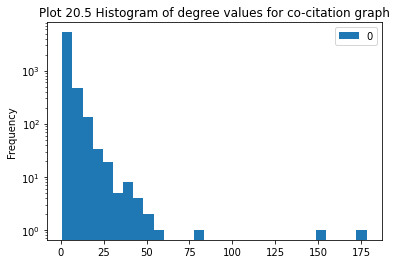

In [101]:
degree_centrality_cocitation = hist_and_top_10(networkx.degree, cocitation_graph, "Plot 20.5 Histogram of degree values for co-citation graph")

{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ion Stoica', 'id': '2161479384', 'org': 'U.C. Berkeley'}
{'name': 'Rodrigo N. Calheiros', 'id': '2081216724', 'org': 'The University of Melbourne'}
{'name': 'Anton Beloglazov', 'id': '2061447099', 'org': 'The University of Melbourne, Australia'}
{'name': 'Albert Y. Zomaya', 'id': '698114488', 'org': 'Centre for Distributed and High Performance Computing, School of Information Technologies, The University of Sydney, NSW 2006, Australia and NICTA, Australian Technology Park, Eveleigh, NSW 2015, ...#TAB#'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Scott Shenker', 'id': '719828399', 'org': 'ICSI'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Matei Zaharia', 'id': '2009645378', 'org': 'MIT and Databricks, San Francisco, CA#TAB#

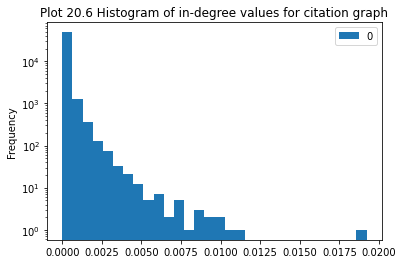

In [104]:
in_degree_centrality_citation = hist_and_top_10(networkx.in_degree_centrality, citation_graph, "Plot 20.6 Histogram of in-degree values for citation graph")

Interpretation: Nodes with highes co-citation with other authors. Just very active authors, in theirs field of studies

Interpretation: a->b if a cite b, so nodes with higher in-degree is the most cited

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Florin Pop', 'id': '2303552343'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Xiaomin Zhu', 'id': '2307065575'}
{'name': 'Samee Ullah Khan', 'id': '2101747962'}
{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ali Allahverdi', 'id': '423755632', 'org': 'Department of Industrial and Management Systems Engineering, Kuwait University, P.O. Box 5969, Safat, Kuw

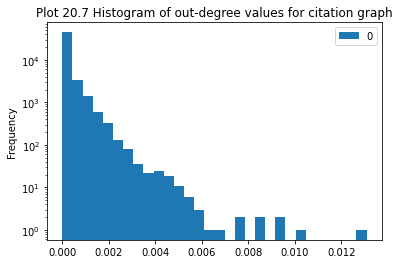

In [105]:
out_degree_centrality_citation = hist_and_top_10(networkx.out_degree_centrality, citation_graph, "Plot 20.7 Histogram of out-degree values for citation graph")

### Betweenness

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Lothar Thiele', 'id': '2156635946', 'org': 'ETH Zurich, Switzerland'}
{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Chuang Lin', 'id': '2126090014', 'org': 'Tsinghua University, Beijing 100084, China'}
{'name': 'Rami Bahsoon', 'id': '274809085', 'org': 'School of Computer Science, The University of Birmingham, United Kingdom, B15 2TT'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Maryline Chetto', 'id': '101319827', 'org': 'IRCCyN, Univ. of Nantes, Nantes, France'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Mohamed Khalgui', 'id':

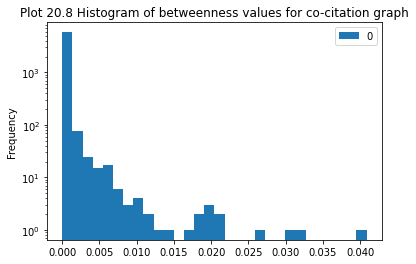

In [180]:
betweenness_centrality_cocitation = hist_and_top_10(networkx.betweenness_centrality, cocitation_graph, "Plot 20.8 Histogram of betweenness values for co-citation graph")

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Liang Gao', 'id': '2118480017', 'org': 'State Key Laboratory of Digital Manufacturing Equipment & Technology , Huazhong University of Science & Technology , Wuhan, P.R. China'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Samee Ullah Khan', 'id': '2101747962'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Rubén Ruiz', 'id': '2293884938', 'org': 'Universidad Politécnica de Valencia, Departamento de Estadística e Investigación Operativa Aplicadas y Calidad, Grupo de Investigación Operativa, Camino de

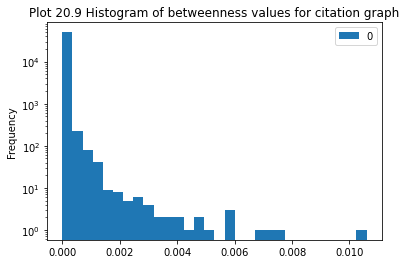

In [181]:
betweenness_centrality_citation = hist_and_top_10(networkx.betweenness_centrality, citation_graph, "Plot 20.9 Histogram of betweenness values for citation graph")

### Closeness

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Lothar Thiele', 'id': '2156635946', 'org': 'ETH Zurich, Switzerland'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Dakai Zhu', 'id': '2154569489', 'org': 'Dept. of Comput. Sci., Univ. of Texas at San Antonio, San Antonio, TX, USA'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Cheng Zhong Xu', 'id': '2572966537', 'org': 'Shenzhen Institutes of Advanced Technology, Chinese Academy of Sciences, China'}
{'name': 'Hai Jin', 'id': '2168417342', 'or

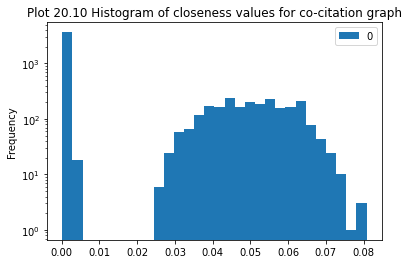

In [177]:
closeness_centrality_cocitation = hist_and_top_10(networkx.closeness.closeness_centrality, cocitation_graph, "Plot 20.10 Histogram of closeness values for co-citation graph")

{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ion Stoica', 'id': '2161479384', 'org': 'U.C. Berkeley'}
{'name': 'Scott Shenker', 'id': '719828399', 'org': 'ICSI'}
{'name': 'Randy H. Katz', 'id': '2246122413', 'org': 'Computer Science Division, University of California at Berkeley'}
{'name': 'Matei Zaharia', 'id': '2009645378', 'org': 'MIT and Databricks, San Francisco, CA#TAB#'}
{'name': 'Ali Ghodsi', 'id': '1884851915', 'org': 'University of California at Berkeley, Berkeley, CA, USA'}
{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Rodrigo N. Calheiros', 'id': '2081216724', 'org': 'The University of Melbourne'}
{'name': 'Anton Beloglazov', 'id': '2061447099', 'org': 'The University of Melbourne, Australia'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}


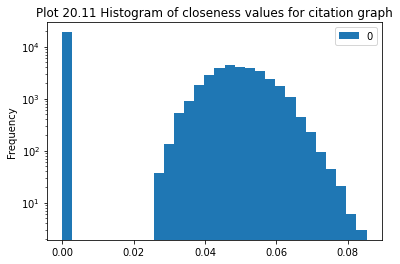

In [178]:
closeness_centrality_citation = hist_and_top_10(networkx.closeness.closeness_centrality, citation_graph, "Plot 20.11 Histogram of closeness values for citation graph")

### Clustering

{'name': 'Alberto Vergnano', 'id': '2018630720', 'org': 'Department of Mechanical and Civil Engineering, University of Modena and Reggio Emilia, Italy'}
{'name': 'Claes Breitholtz', 'id': '2110313117', 'org': 'Chalmers University of Technology, Göteborg, Sweden'}
{'name': 'Bo Yu', 'id': '2118390767', 'org': 'Dept. of Electr. & Comput. Eng., Colorado State Univ., Fort Collins, CO, USA'}
{'name': 'Sayandev Mukherjee', 'id': '2781037445', 'org': 'DOCOMO Innovations, Inc., Palo Alto, CA 94304'}
{'name': 'Hiroyuki Ishii', 'id': '2126754882', 'org': 'NTT DOCOMO, Inc., Tokyo, Japan'}
{'name': 'Omid Semiari', 'id': '2807214924', 'org': 'Wireless@VT, Bradley Department of Electrical and Computer Engineering, Virginia Tech, Blacksburg, USA'}
{'name': 'Walid Saad', 'id': '2696869083', 'org': 'University of Miami'}
{'name': 'Frederick Vook', 'id': '1271690326', 'org': 'Nokia Networks'}
{'name': 'Xiang Cheng', 'id': '2146109574', 'org': 'Sch. of Electron. Eng. & Comput. Sci., Peking Univ., Beijing,

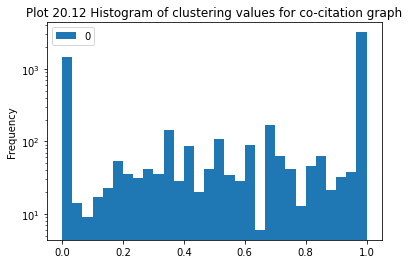

In [109]:
clustering_cocitation = hist_and_top_10(networkx.clustering, cocitation_graph, "Plot 20.12 Histogram of clustering values for co-citation graph")

{'name': 'V. Kaviha', 'id': '2283559556'}
{'name': 'V. Kannan', 'id': '2479356268'}
{'name': 'S. Ravi', 'id': '2892597754'}
{'name': 'Xiaodong Liu', 'id': '2599674306', 'org': 'The Research Center of Information and Control, Dalian University of Technology, Dalian, China 116024'}
{'name': 'James A. Rodger', 'id': '2134323721', 'org': 'Indiana University of Pennsylvania, PA'}
{'name': 'Wei Huang', 'id': '2620156637', 'org': 'School of Computer and Communication Engineering, Tianjin University of Technology, Tianjin 300384, China#TAB#'}
{'name': 'Xianchang Wang', 'id': '2474339028', 'org': 'School of Sciences, Dalian Ocean University, Dalian 116023, PR China#TAB#'}
{'name': 'Piotr Palka', 'id': '2764692919'}
{'name': 'Valeria Petrini', 'id': '2235557950', 'org': 'Fondazione Ugo Bordoni (FUB), Italy'}
{'name': 'Marina Barbiroli', 'id': '2893263283', 'org': "Department of Electronics, Computer Sciences and Systems of Bologna's University Italy"}


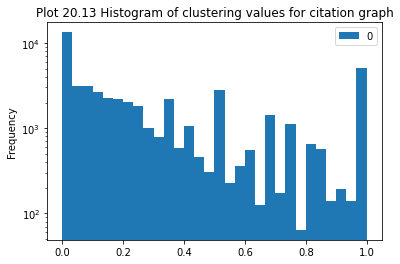

In [117]:
clustering_citation = hist_and_top_10(networkx.clustering, citation_graph, "Plot 20.13 Histogram of clustering values for citation graph")

### Eigenvector centrality

{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Sanjoy K. Baruah', 'id': '2145728887', 'org': 'Department of Electrical Engineering and Computer Science, The University of Vermont, Burlington, VT 05405, USA'}
{'name': 'Alberto Marchetti-Spaccamela', 'id': '1996985197', 'org': 'Dipartimento di Informatica e Sistemistica, Università di Koma “La Sapienza”, via Eudossiana 18, 00184 Roma, Italy'}
{'name': 'Insik Shin', 'id': '2098336271', 'org': 'KAIST, South Korea'}
{'name': 'Vincenzo Bonifaci', 'id': '2086928653', 'org': 'Consiglio Nazionale delle Ricerche'}
{'name': 'Wang Yi', 'id': '2124415778', 'org': 'Dept. of Inf. Technol., Uppsala Univ., Uppsala, Sweden'}
{'name': 'Nan Guan', 'id': '2125811161', 'org': 'Dept. of Inf. Technol., Uppsala Univ., Uppsala, Sweden'}
{'name': 'Chenyang Lu', 'id': '

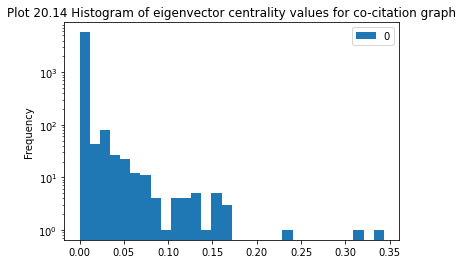

In [110]:
eigenvector_centrality_numpy_cocitation = hist_and_top_10(networkx.eigenvector_centrality_numpy, cocitation_graph, "Plot 20.14 Histogram of eigenvector centrality values for co-citation graph")

{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Sanjoy K. Baruah', 'id': '2145728887', 'org': 'Department of Electrical Engineering and Computer Science, The University of Vermont, Burlington, VT 05405, USA'}
{'name': 'Alberto Marchetti-Spaccamela', 'id': '1996985197', 'org': 'Dipartimento di Informatica e Sistemistica, Università di Koma “La Sapienza”, via Eudossiana 18, 00184 Roma, Italy'}
{'name': 'Leen Stougie', 'id': '2026401822', 'org': 'Mathematical Centre, Amsterdam, The Netherlands#TAB#'}
{'name': 'James H. Anderson', 'id': '2113290946', 'org': 'Department of Computer Science, University of North Carolina at Chapel Hill, Chapel Hill, USA#TAB#'}
{'name': 'Wang Yi', 'id': '2124415778', 'org': 'Dept. of Inf. Technol., Uppsala Univ., Uppsala, Sweden'}
{'name': 'Chenyang Lu', 'id': '209976

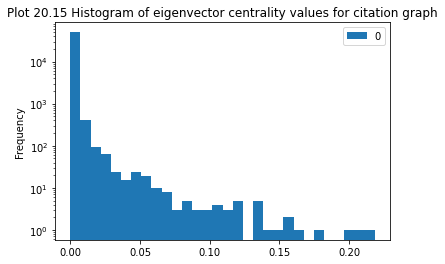

In [166]:
eigenvector_centrality_numpy_citation = hist_and_top_10(networkx.eigenvector_centrality_numpy, citation_graph, "Plot 20.15 Histogram of eigenvector centrality values for citation graph")

## Year by year analysis for schedulers group

In [111]:
def create_citation_graph(dataframe):
    citation_dict = {}
    def fill_graph(row, graph):
        authors = list(row["authors"])
        references_authors = list(row["author_references"])
        for author in list(authors):
            for reference_author in references_authors:
                edge_name = str(author["index"]) + "_" + str(reference_author)
                weight = graph.get(edge_name, 0)
                graph[edge_name] = weight + 1

    dataframe.apply(lambda row: fill_graph(row, citation_dict), axis=1)
    citation_graph = networkx.DiGraph()
    for edge in citation_dict.keys():
        nodes = edge.split("_")
        node_x = int(nodes[0])
        node_y = int(nodes[1])
        weight = int(citation_dict[edge])
        citation_graph.add_edge(node_x, node_y, weight = weight)
    return citation_graph

In [112]:
def get_co_citation_graph(citation_graph):
    bidirectional_nodes = get_bidirectional_nodes(citation_graph)
    cocitation_graph = networkx.Graph()
    for node, neighbours in bidirectional_nodes.items():
        for neighbour in neighbours:
            cocitation_graph.add_edge(node, neighbour)
    return cocitation_graph

In [113]:
def get_articles_from(main_dataset, year_min, year_max):
    lesser_than = main_dataset.loc[main_dataset["year"] <= year_max]
    greater_than = lesser_than.loc[lesser_than["year"] >= year_min]
    return greater_than

In [114]:
def perform_analysis_for(main_df, function, year_min, years):
    results_citations = []
    results_cocitations = []
    for year in years:
        print(year)
        df = get_articles_from(main_df, year_min, year)
        citation_graph = create_citation_graph(df)
        cocitation_graph = get_co_citation_graph(citation_graph)
        results_citations.append(function(citation_graph))
        results_cocitations.append(function(cocitation_graph))
    return (results_citations, results_cocitations)
    

In [115]:
def get_top(function):
    def top_function(data):
        res = function(data)
        sorted_res = list(res.items())
        sorted_res.sort(key=lambda x: x[1], reverse=True)
        return sorted_res
    return top_function

In [161]:
def plot_res(res, title):
    plt.figure()
    ax = plt.subplot(111)
    for i in pandas.DataFrame(res).groupby(1):
        i[1].plot.line(x=0, y=2, ax=ax, label=get_author_data(i[0])["name"])
    ax.set_xlabel("years")
    ax.set_title(title)
    return ax

In [162]:
def get_top_10_yby(raw_res, top10, years):
    top10_indexes = list(map(lambda x: x[0], top10[:10]))
    res_as_tuples = [(year, list(res)) for year, res in zip(years, raw_res)]
    res_rows = []
    for (year, res_list) in res_as_tuples:
        for (index, value) in res_list:
            if index in top10_indexes:
                res_rows.append((year, index, value))
    return res_rows

2011
2012
2013
2014
2015
2016
2017


Text(0, 0.5, 'Clustering')

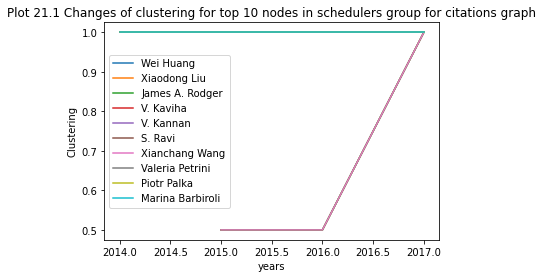

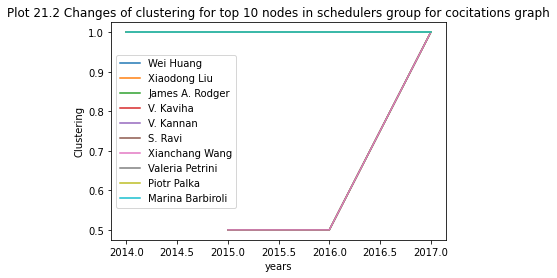

In [164]:
years = range(2011, 2018)

(clustering_citations_res, clustering_cocitations_res) = perform_analysis_for(filtered_slice, get_top(networkx.clustering), 2011, years)
# citation
res_rows_citation = get_top_10_yby(clustering_citations_res, clustering_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.1 Changes of clustering for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("Clustering")
# cocitation
res_rows_citation = get_top_10_yby(clustering_citations_res, clustering_cocitation, years)
ax = plot_res(res_rows_citation, "Plot 21.2 Changes of clustering for top 10 nodes in schedulers group for cocitations graph")
ax.set_ylabel("Clustering")

2011
2012
2013
2014
2015
2016
2017


Text(0, 0.5, 'Eigen vector centrality')

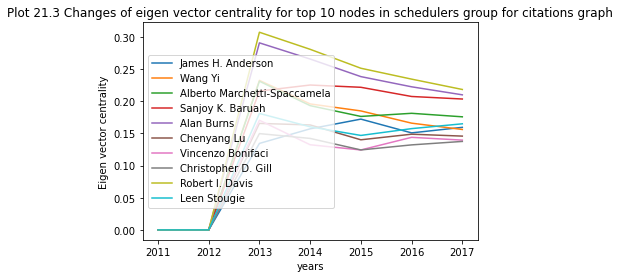

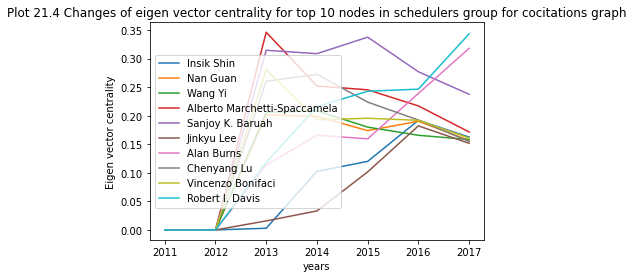

In [167]:
years = range(2011, 2018)

(eigenvector_centrality_numpy_citations_res, eigenvector_centrality_numpy_cocitations_res) = perform_analysis_for(filtered_slice, get_top(networkx.eigenvector_centrality_numpy), 2011, years)
# citation
res_rows_citation = get_top_10_yby(eigenvector_centrality_numpy_citations_res, eigenvector_centrality_numpy_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.3 Changes of eigen vector centrality for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("Eigen vector centrality")
# cocitation
res_rows_citation = get_top_10_yby(eigenvector_centrality_numpy_cocitations_res, eigenvector_centrality_numpy_cocitation, years)
ax = plot_res(res_rows_citation, "Plot 21.4 Changes of eigen vector centrality for top 10 nodes in schedulers group for cocitations graph")
ax.set_ylabel("Eigen vector centrality")

In [169]:
years = range(2011, 2018)
main_df = filtered_slice
year_min = 2011

in_degree_function_top = get_top(networkx.in_degree_centrality)
out_degree_function_top = get_top(networkx.out_degree_centrality)
degree_function_top = get_top(networkx.degree_centrality)

in_degree_citations_res = []
out_degree_citations_res = []
degree_cocitations_res= []
for year in years:
    print(year)
    df = get_articles_from(main_df, year_min, year)
    citation_graph = create_citation_graph(df)
    cocitation_graph = get_co_citation_graph(citation_graph)
    in_degree_citations_res.append(in_degree_function_top(citation_graph))
    out_degree_citations_res.append(out_degree_function_top(citation_graph))
    degree_cocitations_res.append(degree_function_top(citation_graph))

2011
2012
2013
2014
2015
2016
2017


Text(0, 0.5, 'In degree centrality')

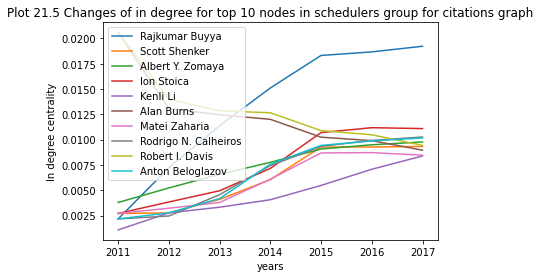

In [174]:
# in degree citation
res_rows_citation = get_top_10_yby(in_degree_citations_res, in_degree_centrality_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.5 Changes of in degree for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("In degree centrality")

Text(0, 0.5, 'Out degree centrality')

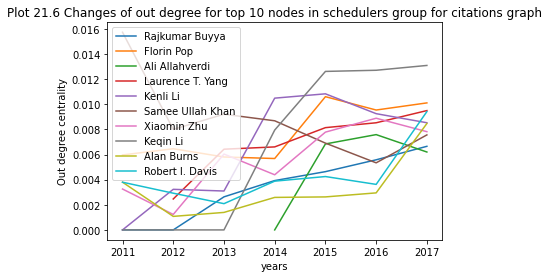

In [175]:
# in degree citation
res_rows_citation = get_top_10_yby(out_degree_citations_res, out_degree_centrality_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.6 Changes of out degree for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("Out degree centrality")

Text(0, 0.5, 'Degree centrality')

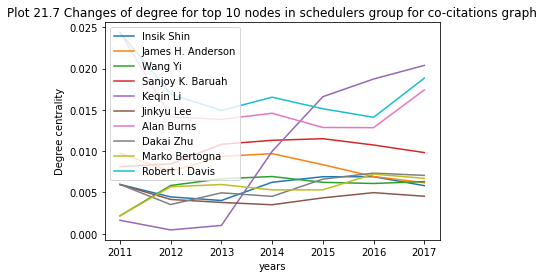

In [176]:
# in degree citation
res_rows_citation = get_top_10_yby(degree_cocitations_res, degree_centrality_cocitation, years)
ax = plot_res(res_rows_citation, "Plot 21.7 Changes of degree for top 10 nodes in schedulers group for co-citations graph")
ax.set_ylabel("Degree centrality")

2011
2012
2013
2014
2015
2016
2017


Text(0, 0.5, 'Closeness centrality')

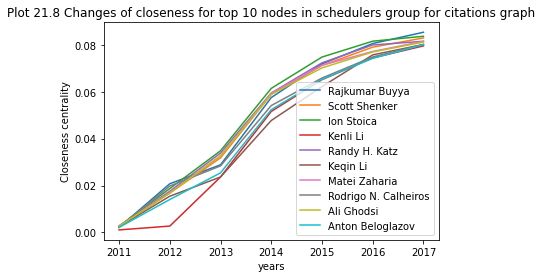

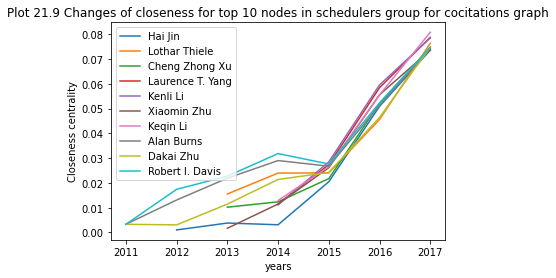

In [179]:
years = range(2011, 2018)

(closeness_citations_res, closeness_cocitations_res) = perform_analysis_for(filtered_slice, get_top(networkx.closeness_centrality), 2011, years)
# citation
res_rows_citation = get_top_10_yby(closeness_citations_res, closeness_centrality_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.8 Changes of closeness for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("Closeness centrality")
# cocitation
res_rows_citation = get_top_10_yby(closeness_cocitations_res, closeness_centrality_cocitation, years)
ax = plot_res(res_rows_citation, "Plot 21.9 Changes of closeness for top 10 nodes in schedulers group for cocitations graph")
ax.set_ylabel("Closeness centrality")

In [182]:
years = range(2011, 2018)

(betweenness_citations_res, betweenness_cocitations_res) = perform_analysis_for(filtered_slice, get_top(networkx.betweenness_centrality), 2011, years)


2011
2012
2013
2014
2015
2016
2017


Text(0, 0.5, 'Betweenness centrality')

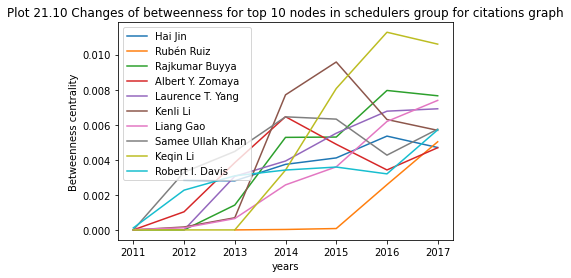

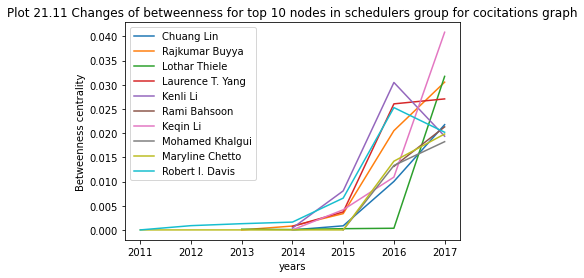

In [183]:
# citation
res_rows_citation = get_top_10_yby(betweenness_citations_res, betweenness_centrality_citation, years)
ax = plot_res(res_rows_citation, "Plot 21.10 Changes of betweenness for top 10 nodes in schedulers group for citations graph")
ax.set_ylabel("Betweenness centrality")
# cocitation
res_rows_citation = get_top_10_yby(betweenness_cocitations_res, betweenness_centrality_cocitation, years)
ax = plot_res(res_rows_citation, "Plot 21.11 Changes of betweenness for top 10 nodes in schedulers group for cocitations graph")
ax.set_ylabel("Betweenness centrality")

In [45]:
citations_df = pandas.DataFrame(add_year(citations_res, range(2011, 2013)))

In [53]:
top10_2011 = citations_df.loc[citations_df[0] == 2011][:10][1]

In [54]:
top10_2012 = citations_df.loc[citations_df[0] == 2012][:10][1]

In [56]:
top10_2012, top10_2011

(1845    155357
 1846     53685
 1847     19759
 1848      2860
 1849     15006
 1850     40615
 1851     29884
 1852      4148
 1853    174645
 1854      5627
 Name: 1, dtype: int64,
 0     27764
 1      8155
 2    103857
 3    369655
 4      8019
 5      3893
 6    115613
 7     53280
 8      8021
 9    135475
 Name: 1, dtype: int64)

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Lothar Thiele', 'id': '2156635946', 'org': 'ETH Zurich, Switzerland'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Dakai Zhu', 'id': '2154569489', 'org': 'Dept. of Comput. Sci., Univ. of Texas at San Antonio, San Antonio, TX, USA'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Cheng Zhong Xu', 'id': '2572966537', 'org': 'Shenzhen Institutes of Advanced Technology, Chinese Academy of Sciences, China'}
{'name': 'Hai Jin', 'id': '2168417342', 'or

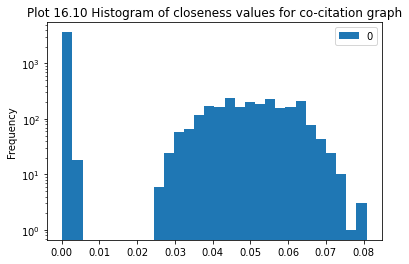

In [70]:
closeness_citation = hist_and_top_10(networkx.closeness.closeness_centrality, cocitation_graph, "Plot 16.10 Histogram of closeness values for co-citation graph")

In [71]:
closeness_cocitation = closeness_citation

In [72]:
x = list(map(lambda x: x[0], closeness_cocitation[:10]))

In [73]:
x

[83747, 34669, 36180, 21857, 369655, 130894, 103857, 31435, 5627, 45429]

In [79]:
cocitation_yby_df = pandas.DataFrame(add_year(cocitations_res, range(2011, 2013)))

In [83]:
numbers = []
for i in x:
    n = cocitation_yby_df.loc[cocitation_yby_df[1] == i]
    numbers.append(n)
numbers

[Empty DataFrame
 Columns: [0, 1, 2]
 Index: [],
 Empty DataFrame
 Columns: [0, 1, 2]
 Index: [],
 Empty DataFrame
 Columns: [0, 1, 2]
 Index: [],
 Empty DataFrame
 Columns: [0, 1, 2]
 Index: [],
         0       1         2
 218  2011  369655  0.003289
 305  2012  369655  0.017401,
         0       1         2
 212  2011  130894  0.003289
 577  2012  130894  0.003061,
         0       1         2
 217  2011  103857  0.003289
 310  2012  103857  0.013094,
 Empty DataFrame
 Columns: [0, 1, 2]
 Index: [],
          0     1        2
 1031  2012  5627  0.00102,
 Empty DataFrame
 Columns: [0, 1, 2]
 Index: []]

In [ ]:
closeness_cocitation

In [295]:
res1 = []
for function in [networkx.clustering, networkx.closeness.closeness_centrality]:
    (citations_res, cocitations_res) = perform_analysis_for(filtered_slice, get_top(function), range(2011, 2018))
    res1.append((citations_res, cocitations_res))

2011
2012
2013
2014
2015
2016
2017
2011
2012
2013
2014
2015
2016
2017


In [43]:
def add_year(dataset, years):
    dataset_with_year_as_tuple = [(year, dataset[index]) for index, year in enumerate(years)]
    dataset_with_year = []
    for data_list in [[(year, index, coef) for index, coef in data] for year, data in dataset_with_year_as_tuple]:
        for data in data_list:
            dataset_with_year.append(data)
    return dataset_with_year

In [296]:
for (citation_res, cocitation_res) in res1:
    citation_with_year = add_year(citation_res)
    cocitation_with_year = add_year(cocitation_res)
    citation_df = pandas.DataFrame(citation_with_year)
    cocitation_df = pandas.DataFrame(cocitation_with_year)
    

In [297]:
(citation_b, cocitation_b) = betweenness_res

In [298]:
citation_b_with_year_as_tuple = [(year, citation_b[index]) for index, year in enumerate(range(2011, 2018))]

In [299]:
citation_b_with_year = []
for data_list in [[(year, index, coef) for index, coef in data] for year, data in citation_b_with_year_as_tuple]:
    for data in data_list:
        citation_b_with_year.append(data)

In [300]:
citation_df = pandas.DataFrame(citation_b_with_year)

In [304]:
len(citation_df[1].unique())

50668

In [291]:
citation_df

,0,1,2
0,2011,27764,0.000197
1,2011,8155,0.000145
2,2011,103857,0.000115
3,2011,369655,0.000115
4,2011,8019,0.000095
...,...,...,...
65,2017,21192,0.004610
66,2017,103857,0.004252
67,2017,40615,0.002997
68,2017,10276,0.002795


In [141]:
import json
authors_index_to_id = {}
with open('authors_index_to_id.json') as json_file:
    authors_index_to_id = json.load(json_file)

In [142]:
authors_id_name_map = {}
with open('authors_id__name_map.json') as json_file:
    authors_id_name_map = json.load(json_file)


In [143]:
def get_author_data(index):
    id_a = authors_index_to_id[str(index)]
    return authors_id_name_map[id_a]

In [62]:
get_author_data(1001)

{'name': 'Emad M. Boctor',
 'id': '2310477595',
 'org': 'Dept. of Radiology, Johns Hopkins Medical Institutions, Baltimore, MD, USA'}

In [177]:
for (author_id, ind) in top10:
    print(get_author_data(author_id))

{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ion Stoica', 'id': '2161479384', 'org': 'U.C. Berkeley'}
{'name': 'Rodrigo N. Calheiros', 'id': '2081216724', 'org': 'The University of Melbourne'}
{'name': 'Anton Beloglazov', 'id': '2061447099', 'org': 'The University of Melbourne, Australia'}
{'name': 'Albert Y. Zomaya', 'id': '698114488', 'org': 'Centre for Distributed and High Performance Computing, School of Information Technologies, The University of Sydney, NSW 2006, Australia and NICTA, Australian Technology Park, Eveleigh, NSW 2015, ...#TAB#'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Scott Shenker', 'id': '719828399', 'org': 'ICSI'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Matei Zaharia', 'id': '2009645378', 'org': 'MIT and Databricks, San Francisco, CA#TAB#

In [ ]:
for (author_id, ind) in top10:
    print(get_author_data(author_id))